In [55]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('wandb_export_2024-03-19T11_55_07.355+01_00.csv')

#Col names of df
probs = ['p_cond_mean', 'p_cond_std']
entropy = ['e_mean', 'e_std']
selected_entropy = ['sel_e_mean', 'sel_e_std']

In [50]:

#Number of iterative decoding steps in MaskGit
timesteps = 10

t = [0,1,2,3,4,5,6,7,8,9]
T = []
#Creates an array to be used as categorical for the different samples in the df
#Creates a Time step array for each sample.
j = 0
sample_nr = []

for i in range(df.shape[0]):
    sample_nr.append(j)
    if ((i+1) % timesteps == 0 and i != 0):
        j += 1
        T += t
        
df['sample_nr'] = sample_nr
df['T'] = T



In [51]:
df

,p_cond_mean,p_cond_std,e_mean,e_std,sel_e_mean,sel_e_std,sample_nr,T
0,0.092522,0.050699,2.645576,0.066816,15.314837,0.643467,0,0
1,0.092131,0.051598,2.640575,0.076958,15.037832,0.617705,0,1
2,0.094034,0.054546,2.627651,0.100635,14.525158,0.705910,0,2
3,0.094805,0.057576,2.604487,0.135165,13.471029,0.630669,0,3
4,0.097476,0.059682,2.582482,0.161428,12.418759,0.614118,0,4
5,0.099433,0.062050,2.557045,0.187931,11.046805,0.630169,0,5
6,0.097194,0.064090,2.527898,0.213924,8.976716,0.446702,0,6
7,0.100237,0.066245,2.494665,0.239076,7.039770,0.560271,0,7
8,0.097437,0.065860,2.451464,0.263622,4.682798,0.420379,0,8
9,0.096654,0.062734,2.397045,0.285144,2.247263,0.307297,0,9


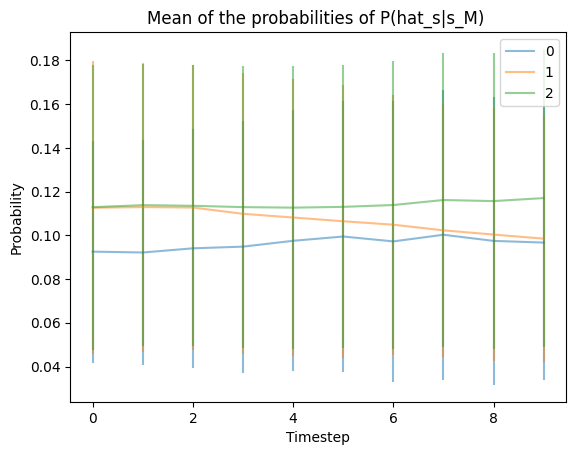

In [73]:
## Plot all samples in same canvas.

fig, ax = plt.subplots()
for key, group in df.groupby('sample_nr'):
    group.plot(x = 'T', y = 'p_cond_mean', yerr = 'p_cond_std', alpha = 0.5, label = key, ax = ax,
               title= 'Mean of the probabilities of P(hat_s|s_M) ', ylabel= "Probability", xlabel= 'Timestep'
               )


## Plot all samples in different canvasses.
# for key, group in df.groupby('sample_nr'):
#     group.plot(x = 'T', y = 'p_cond_mean', yerr = 'p_cond_std',
#                title= 'Mean of the probabilities of P(hat_s|s_M) ', ylabel= "Probability", xlabel= 'Timestep'
#                )


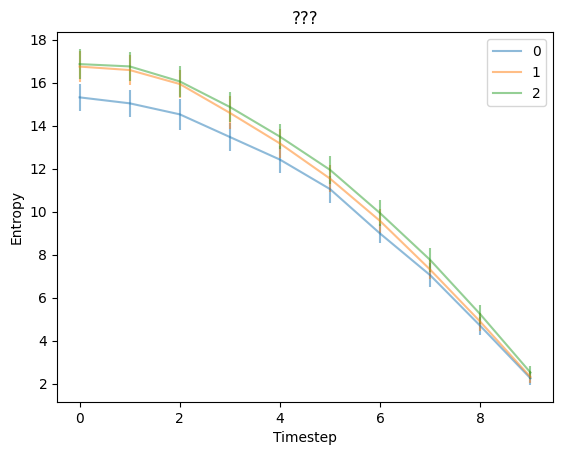

In [77]:
## Plot all samples in same canvas.

fig, ax = plt.subplots()
for key, group in df.groupby('sample_nr'):
    group.plot(x = 'T', y = 'sel_e_mean', yerr = 'sel_e_std', alpha = 0.5, label = key, ax = ax,
               title= '???', ylabel= "Entropy", xlabel= 'Timestep'
               )



## Plot all samples in different canvasses.
# for key, group in df.groupby('sample_nr'):
#     group.plot(x = 'T', y = 'sel_e_mean', yerr = 'sel_e_std',
#                title= 'Mean of the empirical entropy of P(hat_s|s_M) ', ylabel= "Entropy", xlabel= 'Timestep'
#                )




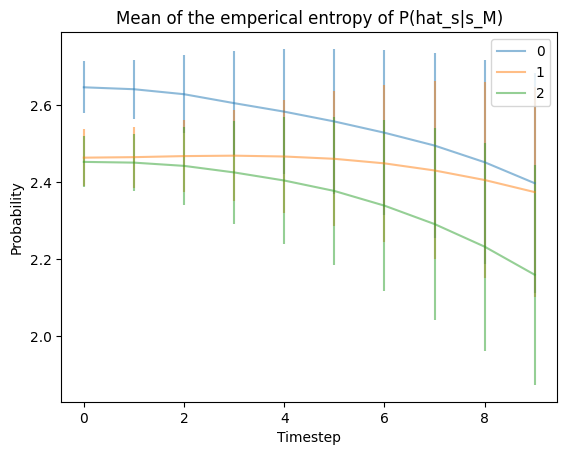

In [76]:
## Plot all samples in same canvas.

fig, ax = plt.subplots()
for key, group in df.groupby('sample_nr'):
    group.plot(x = 'T', y = 'e_mean', yerr = 'e_std', alpha = 0.5, label = key, ax = ax,
               title= 'Mean of the emperical entropy of P(hat_s|s_M)', ylabel= "Entropy", xlabel= 'Timestep'
               )



## Plot all samples in different canvasses.
# for key, group in df.groupby('sample_nr'):
#     group.plot(x = 'T', y = 'e_mean', yerr = 'e_std',
#                title= 'Mean of the emperical entropy of P(hat_s|s_M)', ylabel= "Entropy", xlabel= 'Timestep'
#                )